# Visualizing Many Flips

### Comprehending Many Flips Problem

```Problem Set 2 Probability``` section is a huge speed bump in [Intro to Statistics - Udacity course](https://in.udacity.com/course/intro-to-statistics--st101), providing quizzes of high levels, which could be answered only with deeper knowledge of maths and also probability theory which is in strong contrast with flow of the course (which is irony because typical reader is new to it, that is why he is into the course in first place).  

I have created below snippets to ease the pain. It provides functions to visualize and comprehend probability as no of flips increases. Hopefully it is useful to you.  

Basic python is a pre requisite to understand the functions, but usage is simple and straight forward. 

### Visualize Probability Tree

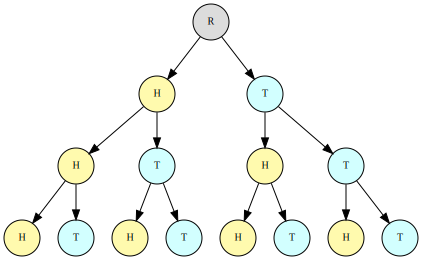

In [1]:
from graphviz import Digraph

g = Digraph()

def draw_graph(g, n_flips=2):
    """
    Given no of flips, this function creates a corresponding probability tree
    """
    #g.attr(rankdir='LR', ranksep='0.5')
    g.attr('node', shape='circle', fontsize='10')
    g.attr('edge', fontsize='10')
    g.node('Root','R',style='filled', fillcolor='#DCDCDC')    # first node
    
    i_outcome = 1
    parent_list = []
    
    for each_flip in range(1, n_flips+1):
        n_outcomes = 2**each_flip
        
        temp_list = []
        p_index = 0 # parent index for each node
        for each_outcome in range(0, int(n_outcomes/2)):  
            
            # draw nodes, record parents
            new_H = 'H{}'.format(i_outcome) 
            new_T = 'T{}'.format(i_outcome)             
            g.node(new_H, 'H', style='filled', fillcolor='#FFFAAE')
            g.node(new_T, 'T', style='filled', fillcolor='#D2FFFF')                     
            i_outcome += 1
            parents = parent_list[-1] if len(parent_list) > 0 else []
            parent = parents[p_index] if len(parents) > 0 else None
            
            # debug
            #print('Flip:{} New H:{} New T:{} Parents:{} Parent Index:{}'.format(each_flip, new_H, new_T,list(parents), p_index))
            #print('Flip:{} New H:{} New T:{} Parent:{}'.format(each_flip, new_H, new_T,parent))
            
            # draw edges
            if parent is not None:
                g.edge(parent, new_H)
                g.edge(parent, new_T)
            else: 
                g.edge('Root', new_H)
                g.edge('Root', new_T)
                
            
            # for next set of H and T
            p_index += 1
            temp_list.append(new_H)
            temp_list.append(new_T)
            
            
            
        parent_list.append(temp_list)
        print()
    return g
        
draw_graph(g, n_flips=3)

### Final Outcomes for any number of flips

In [2]:
import pandas as pd 

def get_combinations(n_flips=2):
    """
    Given the no of flips, this function will provide the final sequence combinations as a panda dataframe
    """
    # setup data frame with necessary cols
    columns = ['sequence', 'x']
    df = pd.DataFrame(columns=columns)
    
    # get the combinations
    from itertools import product
    for i in product(['H','T'], repeat=n_flips):     
        combi = ''.join(i)
        n_H = combi.count('H') # no of heads
        df = df.append({'sequence': combi, 'x': n_H }, ignore_index=True)
        
    # get no of heads in the combinations
    print('Given no of flips:', n_flips)
    print('\nx = no of heads in respective sequence')
        
    return df
    
combi_df = get_combinations(n_flips=3)
combi_df

Given no of flips: 3

x = no of heads in respective sequence


,sequence,x
0,HHH,3
1,HHT,2
2,HTH,2
3,HTT,1
4,THH,2
5,THT,1
6,TTH,1
7,TTT,0


### Characteristics of Probability of Sequences

In [3]:
def get_combinations_consolidated(n_flips=2):
    """
    Given the raw dataframe of combinations, this will provide n(x) and p(x)
    """
    # setup data frame with necessary cols
    columns = ['x', 'n(x)', 'p(x)']
    df = pd.DataFrame(columns=columns)
    
    # get raw data
    combi_df = get_combinations(n_flips=n_flips)
    x_list = combi_df['x'].tolist()
    
    # extract frequency
    #ref: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045
    x_list.sort()
    from itertools import groupby 
    freq_tuple = [ (key, len(list(group))) for key, group in groupby(x_list)]
    #print(freq_tuple)
    
    for each_freq_tuple in freq_tuple:
        x = each_freq_tuple[0]
        n_x = each_freq_tuple[1]
        p_x = n_x/(2**n_flips)  # its a conditional probability, thats y divided by total outcomes
        df = df.append({'x': x, 'n(x)': n_x, 'p(x)': p_x }, ignore_index=True)
        
    # convert cols to integer (except p(x))
    df[['x','n(x)']] = df[['x','n(x)']].astype(int) #ref: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas/21291622

    print('n(x) = total no of possible x type sequences')
    print('for eg, if x = 2, n(x) = 3, then there are 3 possible sequence types, in each of which, no of heads is 2')    
    
    print('\np(x) = conditional probability that n(x) could occur out of all outcomes')
    
    return df

final_df = get_combinations_consolidated(3)
final_df

Given no of flips: 3

x = no of heads in respective sequence
n(x) = total no of possible x type sequences
for eg, if x = 2, n(x) = 3, then there are 3 possible sequence types, in each of which, no of heads is 2

p(x) = conditional probability that n(x) could occur out of all outcomes


,x,n(x),p(x)
0,0,1,0.125
1,1,3,0.375
2,2,3,0.375
3,3,1,0.125


In [4]:
import matplotlib.pyplot as plt

def autoformat(ax, xlabel, ylabel, fontsize):
    """
    Few tweaks for better graph
    """
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(fontsize) # Size here overrides font_prop
        
    ymin = ax.get_ylim()[0]
    ymax = ax.get_ylim()[1]*1.1  # increase space to insert bar value
    ax.set_ylim([ymin,ymax])
    
    # x values should be integers as its no of heads
    xmin = -1
    xmax = ax.get_xlim()[1]
    from math import ceil
    xmaxint = ceil(xmax)+1
    xint = range(xmin, xmaxint)
    ax.set_xticks(xint)    


def autolabel(ax, rects, fontsize):
    """
    Attach a text label above each bar displaying its height
    ref: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html
    """    
    for rect in rects:
        height = rect.get_height()
        #text = '%.4f' % height
        text = '{0: <{width}}'.format(height, width=1) 
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,text, ha='center', va='bottom', fontsize=fontsize+3, color='red')

def plot_combinations_consolidated(df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'No of Heads'
    ylabel = 'No of Sequences\nhaving those no of Heads'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)
    
    ylabel = 'Probability of ANY of Sequences\nhaving those no of Heads'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.45)    
    plt.show()
    
plot_combinations_consolidated(final_df)

### Let us try again all for no of flips as 4

This time from library where we have moved these functions..

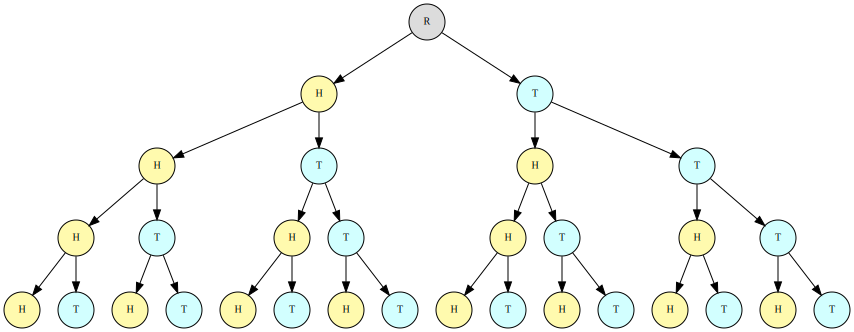

In [5]:
from coinflipviz import draw_graph, get_combinations, get_combinations_consolidated, plot_combinations_consolidated

n_flips = 4

g = Digraph()
g = draw_graph(g, n_flips)
g

In [6]:
combi_df = get_combinations(n_flips)
combi_df

,sequence,x
0,HHHH,4
1,HHHT,3
2,HHTH,3
3,HHTT,2
4,HTHH,3
5,HTHT,2
6,HTTH,2
7,HTTT,1
8,THHH,3
9,THHT,2


In [7]:
final_df = get_combinations_consolidated(n_flips)
final_df

,x,n(x),p(x)
0,0,1,0.0625
1,1,4,0.2500
2,2,6,0.3750
3,3,4,0.2500
4,4,1,0.0625


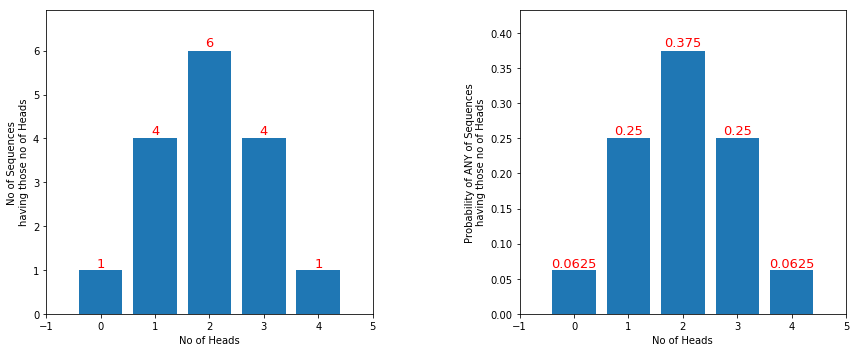

In [8]:
plot_combinations_consolidated(final_df)